In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "C:/Users/Akif/Desktop/football/rankingv5v2.csv" 
data = pd.read_csv(file_path)

# Remove features that might cause data leakage
leakage_features = ['home_club_goals', 'away_club_goals', 'home_team_points', 'away_team_points',
                    'home_attack_value', 'away_attack_value', 'home_midfield_value', 
                    'away_midfield_value', 'home_defender_value', 'away_defender_value', 
                    'home_goalkeeper_value', 'away_goalkeeper_value', 'home_total_market_value', 
                    'away_total_market_value', 'home_power_score', 'away_power_score']

data = data.drop(columns=leakage_features)

# Handle categorical features
le = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Select features and target variable
X = data.drop(columns=['result'])
y = data['result']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use a more complex model, like RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Cross-validation to check for overfitting
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")

Cross-validation accuracy: 0.6587


In [7]:
y_pred = model.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.6694
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      2416
           1       0.68      0.70      0.69      2451
           2       0.69      0.72      0.70      2477

    accuracy                           0.67      7344
   macro avg       0.67      0.67      0.67      7344
weighted avg       0.67      0.67      0.67      7344



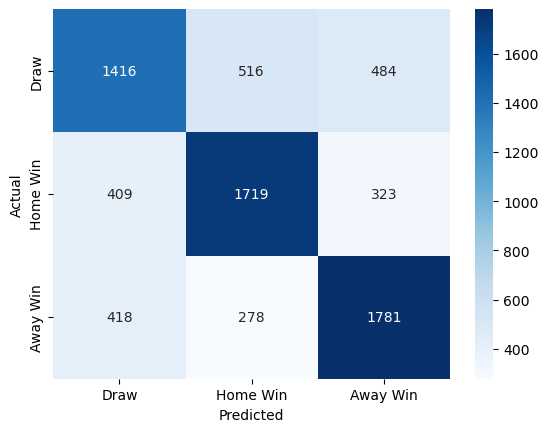

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Draw', 'Home Win', 'Away Win'], yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()